<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>پروژه دوم درس داده کاوی</b>
<br>
<b><font size=5> استاد درس: دکتر فاطمه شاکری</b>
<br>
<font size=4>
<b>مهسا گودرزی - 9912043</b>
<br>
<hr>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<font size=5>
<b> بارگذاری کتابخانه های موردنیاز </b>
<br>
</div>
</font>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> آماده‌سازی داده</b>
<p align="justify">
</p>
</font>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<font size=5>
<b> بارگذاری مجموعه داده </b>
<br>
</div>
</font>

In [15]:
df = pd.read_csv(r"D:\Uni\Term8\DataMining\Tamrin\DataMining_Project2 (1)\Dataset.csv")
df.head()

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> پیش پردازش </b>
<p align="justify">
<font size=5>
<b>
چاپ ابعاد داده
</b>
</p>
</font>
</div>
</font>

In [16]:
df.shape

(145460, 24)

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
بررسی مقادیر گمشده در مجموعه داده
</b>
<br>
در این قسمت 3 راهکار برای کامل‌سازی داده‌ها پیش می‌گیریم:
<br>
1- اگر داده‌های ناقص یک ویژگی بالای 50 هزار تا باشند، آنگاه آن ویژگی (ستون) را از مجموعه داده حذف می‌کنیم.
<br>
2- اگر داده‌های ناقص یک ویژگی بین 10 هزار تا 50 هزار تا باشند، آنگاه مقادیر از دست رفته آن ستون را با میانگین یا مد مابقی مقادیر جایگزین می‌کنیم.
<br>
3- اگر داده‌های ناقص یک ویژگی کم‌تر از 10 هزار تا باشند، آنگاه رکوردهای مرتبط به آن مقادیر از دست رفته را حذف می‌کنیم.
</p>
</font>
</div>
</font>

In [17]:
df.isna().sum()

Unnamed: 0                          0
Date                                0
Weather Station                     0
Minimum Temperature              1485
Maximum Temperature              1261
Rainfall                         3261
Evaporation                     62790
Sunshine                        69835
Gust Trajectory                 10326
Air Velocity                    10263
Gust Trajectory at  9 AM        10566
Gust Trajectory at  3 PM         4228
Air Velocity at  9 AM            1767
Air Velocity at  3 PM            3062
Moisture Level at 9 AM           2654
Moisture Level at 3 PM           4507
Atmospheric Pressure at 9 AM    15065
Atmospheric Pressure at 3 PM    15028
Cloudiness at 9 AM              55888
Cloudiness at 3 PM              59358
Recorded Temperature at 9 AM     1767
Recorded Temperature at 3 PM     3609
Rain that day                    3261
Rain the day after               3267
dtype: int64

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
نمودار Heatmap داده‌های گمشده را رسم می‌کنیم.
</p>
</font>
</div>
</font>

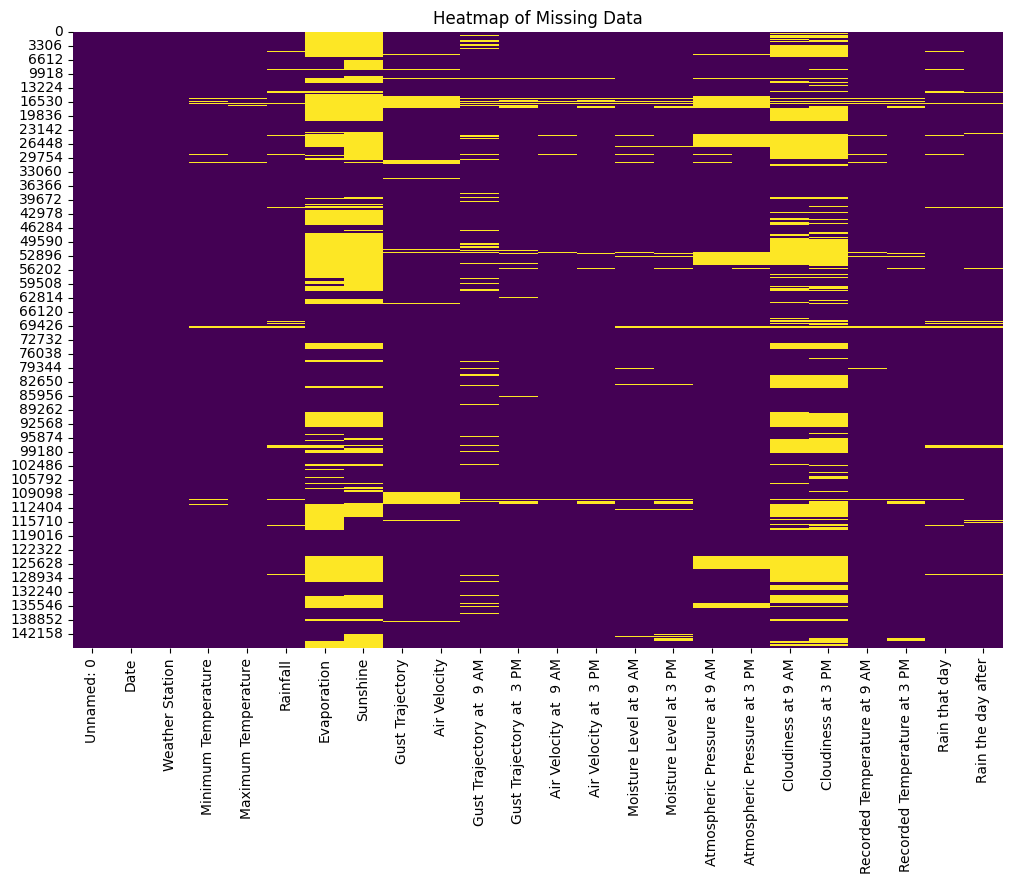

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
با توجه به اینکه مقادیر زیادی (بالای 55 هزار تا) از ویژگی‌های Evaporation و Sunshine و Cloudiness at 9 AM و Cloudiness at 3 PM ناقص هستند، این ویژگی‌ها را از مجموعه داده حذف می‌کنیم.
</p>
</font>
</div>
</font>

In [19]:
df = df.drop(columns=['Evaporation', 'Sunshine', 'Cloudiness at 9 AM', 'Cloudiness at 3 PM'])

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
ویژگی‌های Gust Trajectory و Air Velocity و Gust Trajectory at  9 AM و Atmospheric Pressure at 9 AM و Atmospheric Pressure at 3 PM بین 10 هزار تا 50 هزار داده ناقص دارند، بنابراین مقادیر از دست رفته را با میانگین یا مد مابقی مقادیر جایگزین می‌کنیم. (میانگین برای مقادیر عددی، مد برای مقادیر اسمی)
</p>
</font>
</div>
</font>

In [20]:
df['Air Velocity'] = df['Air Velocity'].fillna(df['Air Velocity'].mean())
df['Atmospheric Pressure at 9 AM'] = df['Atmospheric Pressure at 9 AM'].fillna(df['Atmospheric Pressure at 9 AM'].mean())
df['Atmospheric Pressure at 3 PM'] = df['Atmospheric Pressure at 3 PM'].fillna(df['Atmospheric Pressure at 3 PM'].mean())
df['Gust Trajectory'] = df['Gust Trajectory'].fillna(df['Gust Trajectory'].mode()[0])
df['Gust Trajectory at  9 AM'] = df['Gust Trajectory at  9 AM'].fillna(df['Gust Trajectory at  9 AM'].mode()[0])

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
در ادامه، هر ستونی در یک ردیف دارای مقدار گمشده باشد، آن ردیف حذف می‌شود؛ به عبارت دیگر، در اینجا تمام ردیف‌هایی که حداقل یک مقدار گمشده دارند حذف می‌شوند.
</p>
</font>
</div>
</font>

In [21]:
df = df.dropna(how='any', axis=0)

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
با کامل‌سازی داده‌ها و حذف مقادیر گمشده، می‌بینیم که در کل حدود 12 هزار تا از نمونه‌ها حذف شدند که با توجه به تعداد کل داده‌ها، مقدار خیلی زیادی نیست و تغییر خیلی زیادی در تحلیل ما ایجاد نمی‌کند.
</p>
</font>
</div>
</font>

In [22]:
df.shape

(134590, 20)

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
مقادیر آماری
</b>
</p>
</font>
</div>
</font>

In [23]:
df.describe()

,Unnamed: 0,Minimum Temperature,Maximum Temperature,Rainfall,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM
count,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000
mean,73170.037841,12.189509,23.260816,2.314654,40.055133,14.118055,18.816286,68.659744,51.273891,1017.651663,1015.262058,16.978469,21.749529
std,41729.613392,6.375591,7.062406,8.375341,13.220449,8.832280,8.687083,19.091036,20.754483,6.793114,6.720401,6.471002,6.923049
min,0.000000,-8.500000,-4.800000,0.000000,6.000000,0.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,37020.250000,7.600000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.400000,1011.000000,12.300000,16.700000
50%,73801.500000,12.000000,22.700000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.649940,1015.255889,16.700000,21.200000
75%,108656.750000,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.900000,1019.500000,21.500000,26.500000
max,145458.000000,33.900000,48.100000,371.000000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
بررسی رکوردهای تکراری
</b>
<br>
می‌بینیم که هیچ رکورد تکراری در مجموعه داده وجود ندارد.
</p>
</font>
</div>
</font>

In [24]:
df[df.duplicated(keep=False)]

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after


<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
ایجاد تغییرات لازم در ستون‌ها
</b>
</p>
</font>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
با توجه به اینکه ستون اول مجموعه داده ارزش اطلاعاتی ندارد، این ستون را حذف می‌کنیم.
</p>
</font>
</div>
</font>

In [25]:
df = df.drop(df.columns[0], axis=1)

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
ویژگی Date به شکل Series ذخیره شده است که دیتاتایپ مناسبی برای تحلیل سایر ویژگی ها بر اساس تاریخ نیست. ابتدا آن را به شکل Timestamp در آوردیم.
<br>
هر یک از مقادیر سال، ماه و فصل را از آن استخراج می‌کنیم و در یک ستون جداگانه قرار می‌دهیم.
<br>
درنهایت ستون Date را حذف می‌کنیم.
</p>
</font>
</div>
</font>

In [26]:
type(df['Date'])

pandas.core.series.Series

In [27]:
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')

In [28]:
df['Year'] = df['Date'].dt.year

In [29]:
df['Month'] = df['Date'].dt.month

In [30]:
def get_season(month):
    if month in [3, 4, 5]:
        # Spring
        return 1
    elif month in [6, 7, 8]:
        # Summer
        return 2
    elif month in [9, 10, 11]:
        # Autumn
        return 3
    else:
        # Winter
        return 4

df['Season'] = df['Month'].apply(get_season)

In [31]:
df = df.drop(columns=['Date'])

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
همبستگی بین ویژگی‌های عددی
</b>
</p>
</font>
</div>
</font>

Text(0.5, 1.0, 'Correlation Between Numeric Features')

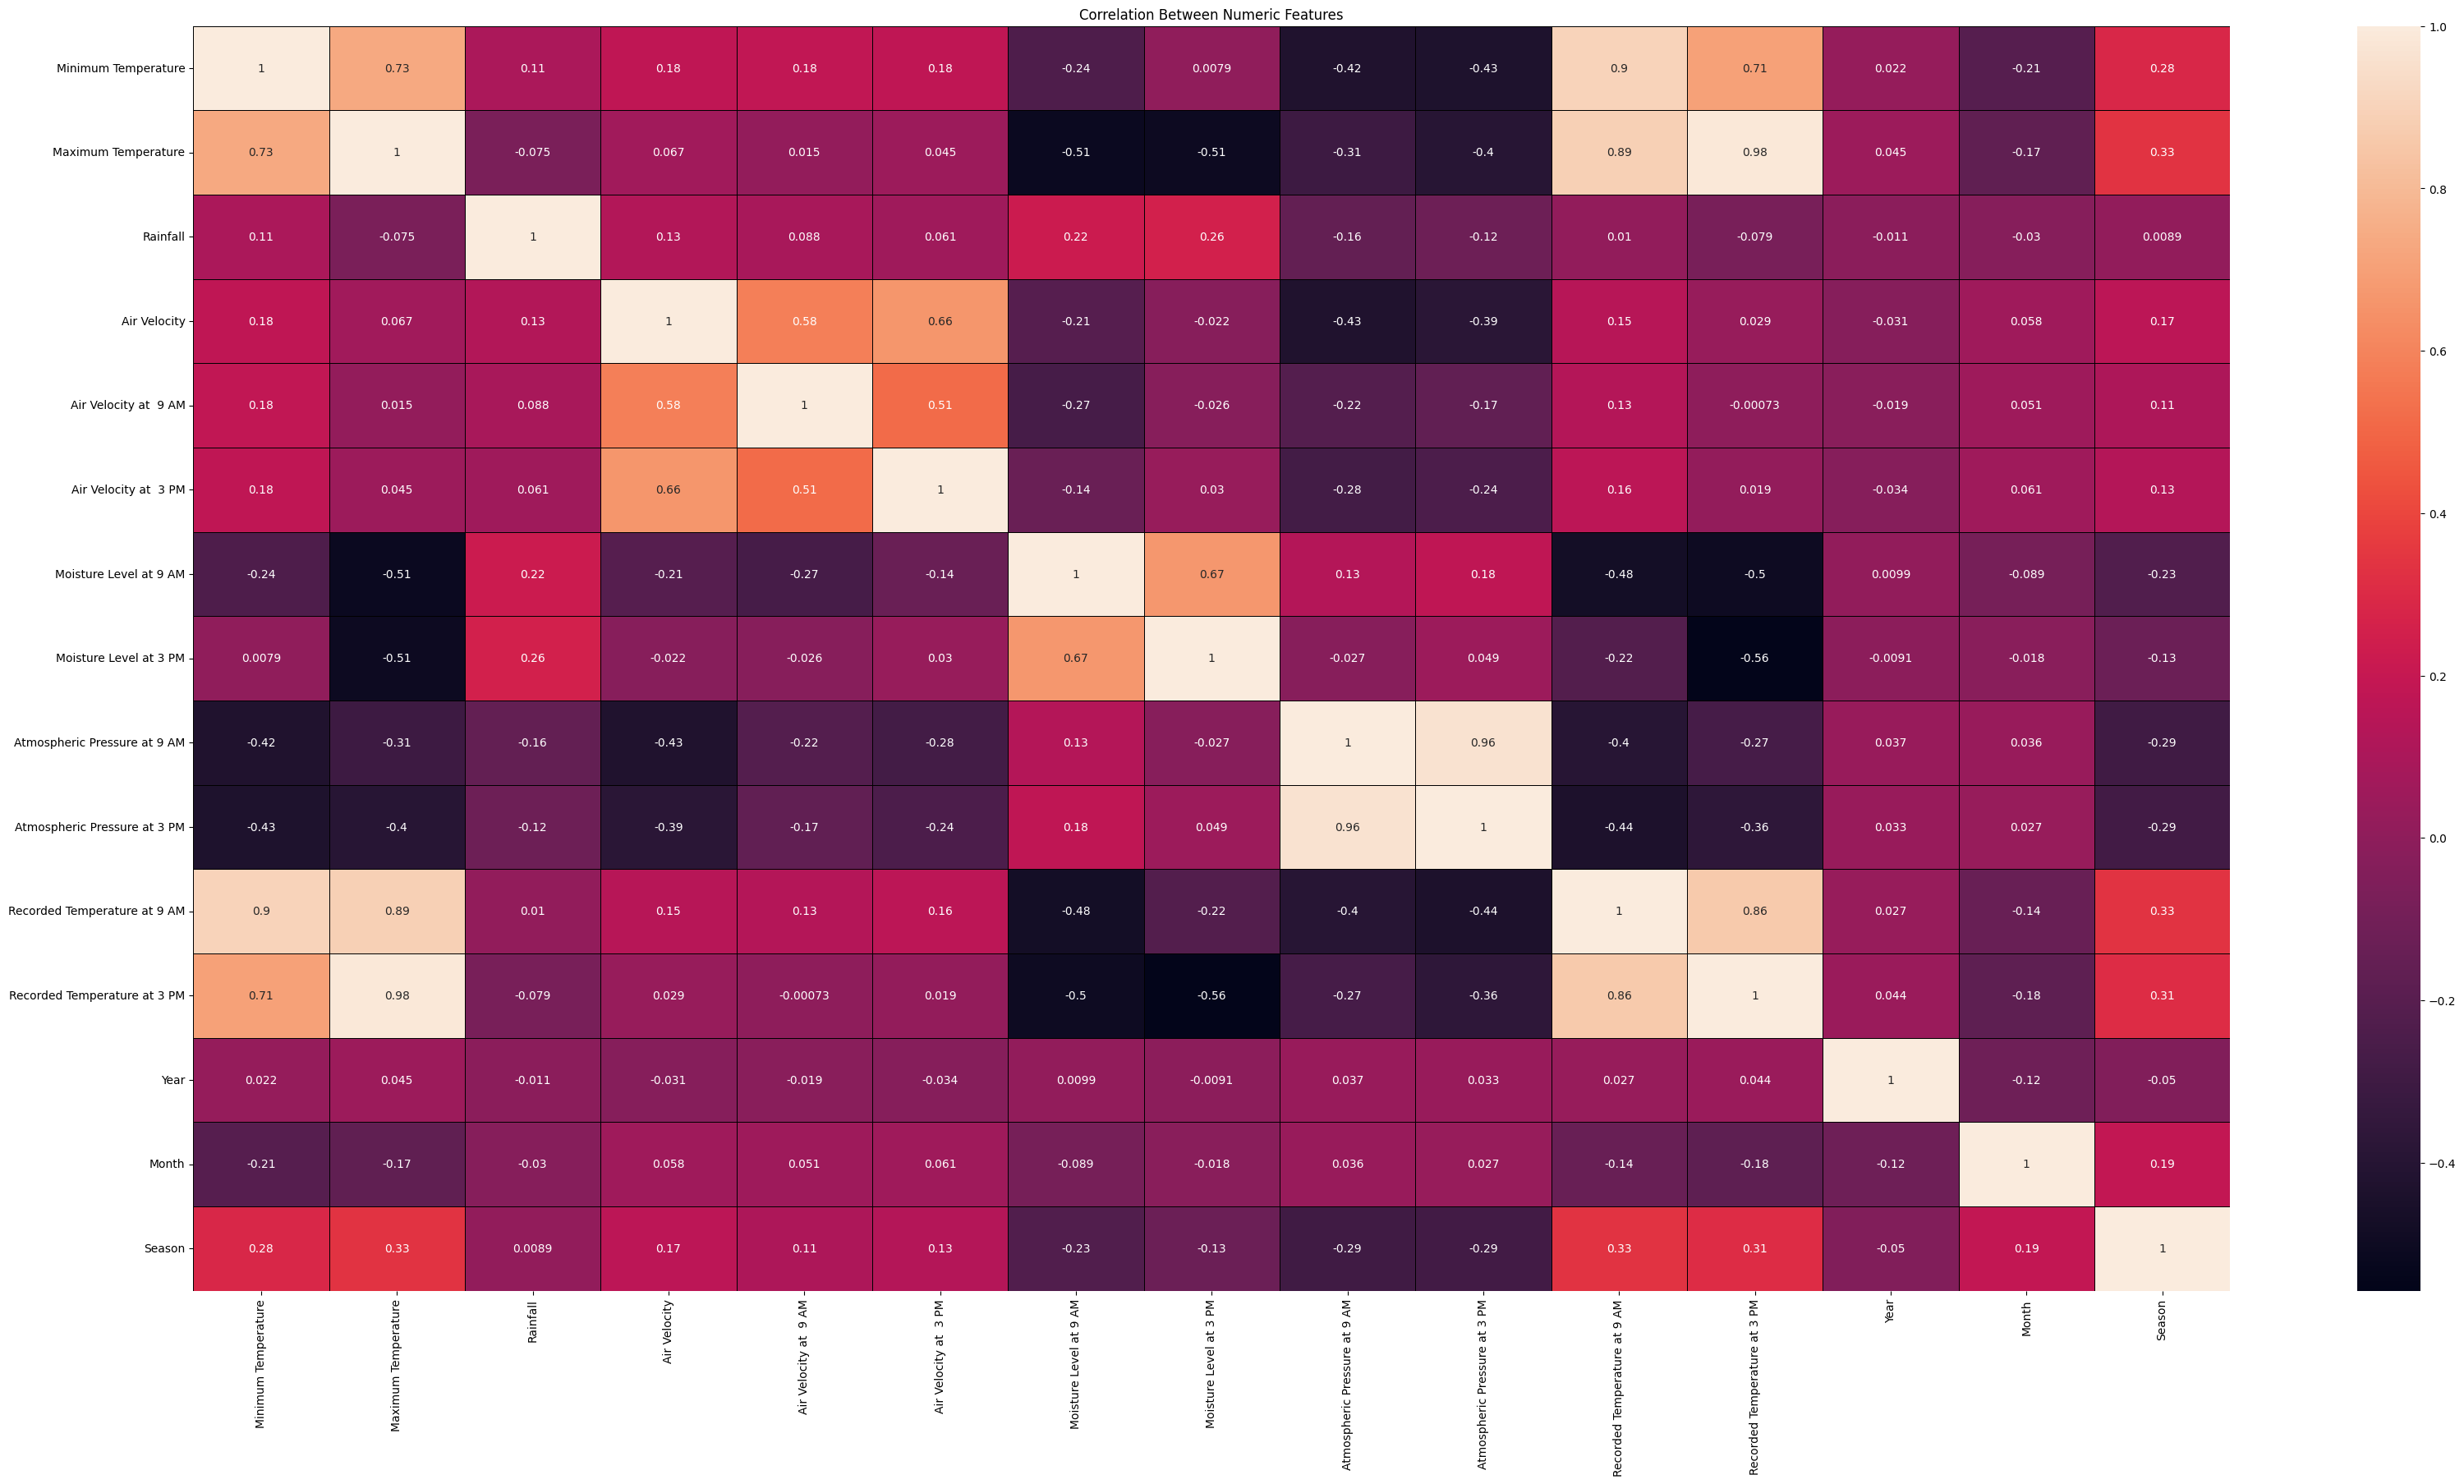

In [32]:
df_numeric = df.select_dtypes(include=np.number)
f,ax = plt.subplots(figsize=(40,20))
sns.heatmap(df_numeric.corr(),linecolor='black', linewidth=0.5 ,annot=True)
plt.title('Correlation Between Numeric Features')

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
در این جدول، ویژگی‌هایی که همبستگی بیش‌تری با هم دارند، رنگ روشن‌تری دارند و بالعکس. از آنجا که ویژگی Maximum Temperature با دو ویژگی Recorded Temperature at 3 PM و Recorded Temperature at 9 AM بیش‌ترین همبستگی را دارد، (به طور مشابه Minimum Temperature با این دو ویژگی)، بنابراین دو ویژگی Recorded Temperature at 3 PM / 9 AM را حذف می‌کنیم. همچنین دو ویژگی Atmospheric Pressure at 3 PM و Atmospheric Pressure at 9 AM همبستگی بسیار بالایی با هم دارند پس یکی از آن‌ها، مثلا Atmospheric Pressure at 3 PM را حذف می‌کنیم.
</p>
</font>
</div>
</font>

In [33]:
df = df.drop(columns=['Recorded Temperature at 9 AM'])
df = df.drop(columns=['Recorded Temperature at 3 PM'])
df = df.drop(columns=['Atmospheric Pressure at 3 PM'])

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
شناسایی داده‌های عددی پرت و حذف آن‌ها
</b>
<br>
نقاط پرت مقادیری هستند که به شدت از الگوی کلی داده‌ها منحرف شده‌اند و می‌توانند تحلیل داده‌ها را تحت تأثیر قرار دهند. در اینجا دو روش مختلف برای تشخیص نقاط پرت را به کار رفته است:

1- روش امتیاز Z: امتیازات Z برای هر مقدار در داده‌ها محاسبه می‌شوند و مقادیری که امتیاز Z آن‌ها کمتر از 3 است (یعنی کمتر از 3 انحراف استاندارد از میانگین فاصله دارند) به عنوان داده‌های غیرپرت حفظ می‌شوند.
<br>
2- روش فاصله بین‌چارکی (IQR): این روش ابتدا چارک اول (Q1) و چارک سوم (Q3) را محاسبه می‌کند و سپس IQR را به دست می‌آورد. داده‌هایی که خارج از محدوده ( Q1 - 1.5 * IQR ) و ( Q3 + 1.5 * IQR ) قرار دارند به عنوان نقاط پرت شناسایی و حذف می‌شوند.
<br>
به طور خلاصه، با استفاده از این دو روش، داده‌هایی که به احتمال زیاد نقاط پرت هستند را شناسایی کرده و از مجموعه داده‌ها حذف می‌کنیم تا تحلیل دقیق‌تری از داده‌های باقی‌مانده انجام شود.
</p>
</font>
</div>
</font>

In [34]:
z_scores = np.abs(stats.zscore(df_numeric))
df_clean = df_numeric[(z_scores < 3).all(axis=1)]

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
df_clean = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
کدگذاری (Encoding)
</b>
<br>
ویژگی‌های Weather Station و Gust Trajectory و Gust Trajectory at  9 AM و Gust Trajectory at  3 PM و Rain that day و Rain the day after، ویژگی‌های categorical هستند. از آنجا که چهار ویژگی اول ترتیب خاصی در بین مقادیرشان ندارند، بنابراین بهتر است که به صورت One-Hot Encoding آن‌ها را کدگذاری کنیم. همچنین دو ویژگی Rain that day و Rain the day after را بهتر است به صورت باینری کد گذاری کنیم که می‌توان آن را Label Encoding نیز حساب کرد.
</p>
</font>
</div>
</font>

In [35]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Weather Station'], prefix='WS', drop_first = True ,dtype=int)
df = pd.get_dummies(df, columns=['Gust Trajectory'], prefix='GT', drop_first = True ,dtype=int)
df = pd.get_dummies(df, columns=['Gust Trajectory at  9 AM'], prefix='GT_9AM', drop_first = True ,dtype=int)
df = pd.get_dummies(df, columns=['Gust Trajectory at  3 PM'], prefix='GT_3PM', drop_first = True ,dtype=int)

# Label Encoding
df['Rain that day'] = df['Rain that day'].map({'No': 0, 'Yes': 1})
df['Rain the day after'] = df['Rain the day after'].map({'No': 0, 'Yes': 1})

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
ذخیره ویژگی‌ها و کلاس نمونه‌ها در متغیرهای مجزا
</b>
</p>
</font>
</div>
</font>

In [36]:
# Features
X = df.drop(columns='Rain the day after')
# Target
y = df['Rain the day after'].ravel()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
برطرف‌سازی عدم توازن در داده‌ها
</b>
<br>
یکی از روش‌های موثر برای مقابله با داده‌های غیر متوازن، استفاده از SMOTE (Synthetic Minority Over-sampling Technique) است. SMOTE نمونه‌های جدیدی را  برای کلاس با تعداد کمتر با ترکیب ویژگی‌های نمونه‌های موجود در آن کلاس ایجاد می‌کند. این کار باعث می‌شود که تعداد نمونه‌ها در هر دو کلاس به تعادل نزدیک‌تر شود و از این رو، مدل یادگیری ماشین دقت بهتری خواهد داشت.
با اعمال این روش، به خوبی مشاهده می‌شود که ما بهبود عملکرد مدل‌ها را خواهیم داشت.
</p>
</font>
</div>
</font>

In [37]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
تقسیم داده‌ها به دو مجموعه داده‌های آموزشی و داده‌های آزمایشی
</b>
<br>
80 درصد داده‌ها را به عنوان داده‌های آموزشی و 20 درصد داده‌ها را به عنوان داده‌های آزمایشی انتخاب می‌کنیم. پارامتر random_state اطمینان می‌دهد که تقسیم داده‌ها به صورت تکرارپذیر باشد. به این معنی که هر بار کد را اجرا کنیم، تقسیم داده‌ها یکسان خواهد بود.
</p>
</font>
</div>
</font>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
ویژگی‌های مجموعه داده آموزشی و برچسب آن‌ها را در یک DataFrame جدید به نام df_train و ویژگی‌های مجموعه داده آزمایشی و برچسب آن‌ها را در یک DataFrame جدید به نام df_test ذخیره می‌کنیم. در ادامه با این دو تا DataFrame برای مصورسازی داده‌های آموزشی و استاندارد سازی و کاهش بعد داده‌ها کار می‌کنیم.
</p>
</font>
</div>
</font>

In [39]:
df_train = X_train.copy()
df_train['Rain the day after'] = y_train
df_test = X_test.copy()
df_test['Rain the day after'] = y_test

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=6>
<b>
بصری‌سازی داده‌های آموزشی
</b>
</p>
</font>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
نمودار توزیع ویژگی فصل بارش بر اساس بارش در آن روز را رسم می‌کنیم. در واقع می‌خواهیم ببینیم که فصل چقدر تاثیر بر میزان بارش دارد. با توجه به این نمودار، می‌بینیم که در تمام فصول سال میزان روزهای بارانی از روزهای غیر بارانی کم‌تر است. همچنین بیش‌ترین روزهای بارانی مربوط به فصل دوم (یعنی تابستان) و کم‌ترین روزهای بارانی مربوط به فصل چهارم (یعنی زمستان) است.
</p>
</font>
</div>
</font>

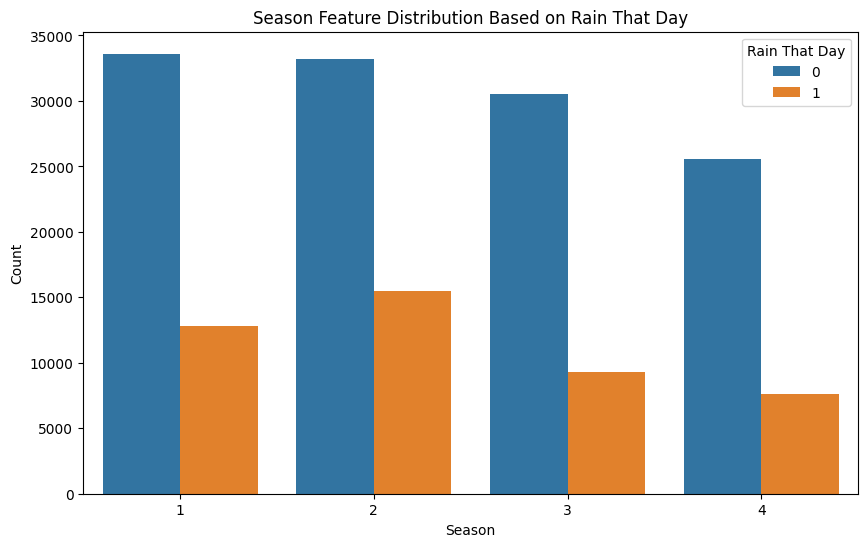

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Rain that day', data=df_train)
plt.title('Season Feature Distribution Based on Rain That Day')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Rain That Day')
plt.show()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
نمودار توزیع ویژگی ماه بارش بر اساس بارش در آن روز را رسم می‌کنیم. در واقع می‌خواهیم ببینیم که ماه چقدر تاثیر بر میزان بارش دارد. با توجه به این نمودار، می‌بینیم که در تمام ماه‌های سال میزان روزهای بارانی از روزهای غیر بارانی کم‌تر است. همچنین بیش‌ترین روزهای بارانی مربوط به ماه ششم (یعنی ژوئن) و کم‌ترین روزهای بارانی مربوط به ماه دوازدهم (یعنی دسامبر) است.
</p>
</font>
</div>
</font>

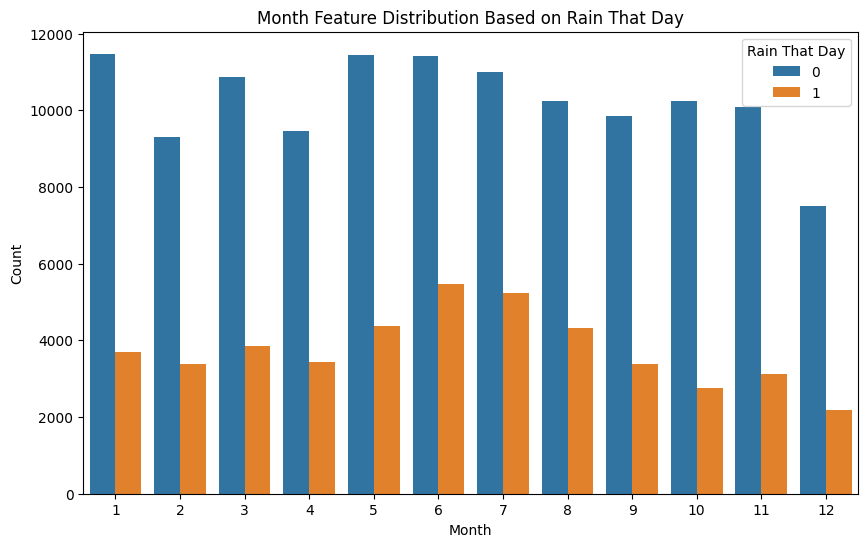

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Rain that day', data=df_train)
plt.title('Month Feature Distribution Based on Rain That Day')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Rain That Day')
plt.show()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
نمودار توزیع ویژگی وضعیت بارش آن روز بر اساس بارش در روز بعد را رسم می‌کنیم. در واقع می‌خواهیم ببینیم چقدر وضعیت بارش هر روز چقدر به وضعیت بارش روز قبل بستگی دارد. با توجه به نمودار، می‌توانیم بفهمیم در روزی وضعیت بارانی باشد، احتمال بارش در روز بعد، بیش‌تر از عدم بارش است. همچنین اگر روزی وضعیت غیر بارانی باشد، احتمال بارش در روز بعد کم‌تر از عدم بارش است. اما در کل می‌توان دید در بین روزهای بعدی که بارانی هستند، تعداد روزهای قبل غیر بارانی بیش‌تر از روزهای قبل بارانی است.
</p>
</font>
</div>
</font>

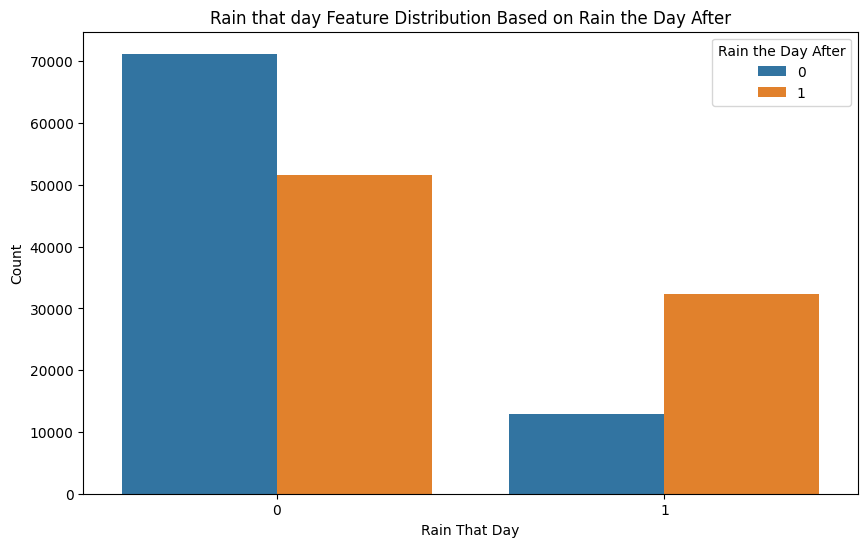

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rain that day', hue='Rain the day after', data=df_train)
plt.title('Rain that day Feature Distribution Based on Rain the Day After')
plt.xlabel('Rain That Day')
plt.ylabel('Count')
plt.legend(title='Rain the Day After')
plt.show()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
نمودار توزیع ویژگی سرعت قوی‌ترین باد در آن روز بر اساس بارش روز بعد را رسم می‌کنیم. با توجه به نمودار، در روزهایی که روز بعد وضعیت بارانی است، سرعت قوی‌ترین باد در آن روز بیش‌تر در محدوده 40 کیلومتر بر ساعت قرار دارد. همچنین اگر قوی‌ترین باد سرعتی در حدود 20 کیلومتر بر ساعت داشته باشد، احتمال بارانی بودن روز بعد کم‌تر از غیر بارانی بودن آن است و اگر این سرعت در حدود 80 کیلومتر بر ساعت (و بالاتر) باشد، احتمال بارانی بودن روز بعد بیش‌تر از عدم بارانی بودن آن است. در واقع نمودار توزیع سرعت باد روزهای بارانی، از نظر طولی کشیده‌تر و نمودار توزیع سرعت باد روزهای غیر بارانی از نظر عرضی پهن‌تر است.
</p>
</font>
</div>
</font>

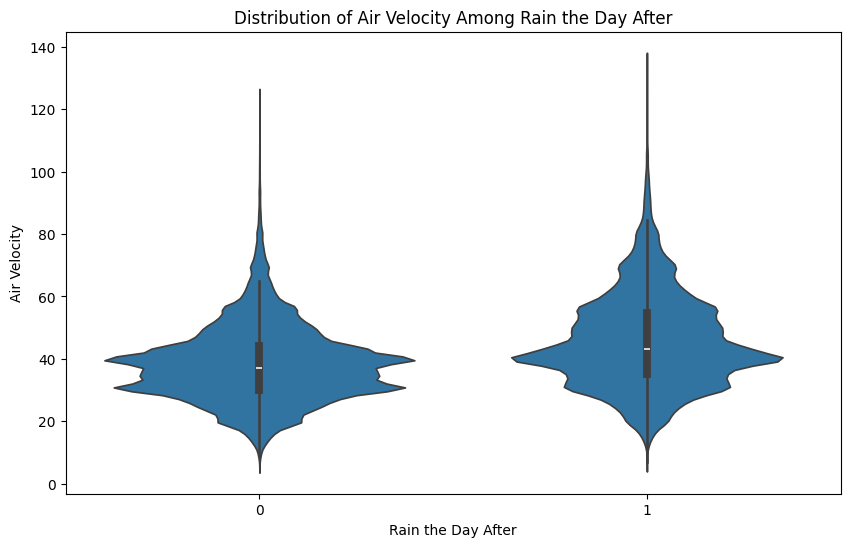

In [43]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Rain the day after', y='Air Velocity', data=df_train)
plt.title('Distribution of Air Velocity Among Rain the Day After')
plt.xlabel('Rain the Day After')
plt.ylabel('Air Velocity')
plt.show()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
نمودار توزیع سال روزهای بارانی را رسم می‌کنیم. بر اساس این نمودار در می‌یابیم که توزیع سال در بین روزهای بارانی تقریبا یکنواخت است. در واقع بیش‌ترین روزهای بارانی مربوط به سال 2010 و کم‌ترین روزهای بارانی مربوط به سال 2008 است. همچنین چولگی نمودار 0.11 است و نمودار چولگی مثبتی دارد؛ در واقع به صورت کلی بارش در سال‌های جدیدتر کمی کم‌تر از بارش‌های در سال‌های قبل‌تر شده است اما با توجه به نزدیک بودن چولگی به صفر، این تفاوت آنقدر زیاد نیست.
</p>
</font>
</div>
</font>

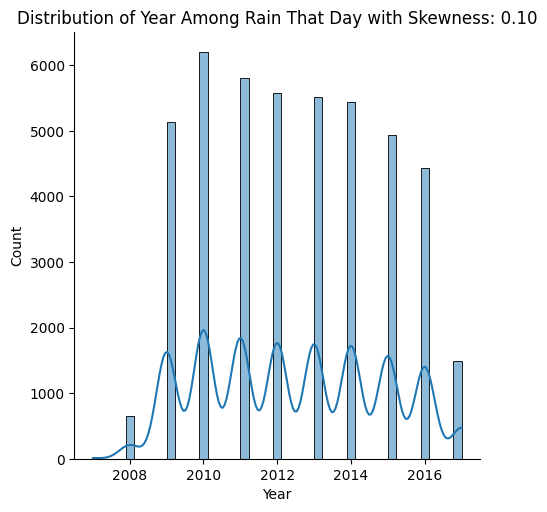

In [44]:
rainy_days = df_train[df_train['Rain that day'] == 1]
sns.displot(rainy_days['Year'], kde=True)
skewness = rainy_days['Year'].skew()
plt.title(f'Distribution of Year Among Rain That Day with Skewness: {skewness:.2f}')
plt.xlabel('Year')
plt.show()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=6>
<b>
استاندارد سازی داده‌ها و کاهش بعد آن‌ها
</b>
</p>
</font>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
ابتدا داده‌های آموزش و آزمایشی را در یک DataFrame جدید به نام df_combined ترکیب می‌کنیم تا عمل استانداردسازی و کاهش بعد را روی آن‌ها انجام دهیم و سپس این داده‌ها را به همان ترتیب از همدیگر جدا می‌کنیم. ویژگی‌ها را در متغیر X و برچسب‌ها را در متغیر y ذخیره می‌کنیم.
</p>
</font>
</div>
</font>

In [45]:
# Concat df_train and df_test for One-Hot Encoding
df_combined = pd.concat([df_train, df_test], axis=0)

X = df_combined.drop(columns='Rain the day after')
y = df_combined['Rain the day after'].ravel()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
استانداردسازی داده‌ها: نتیجه استانداردسازی این است که X به یک مجموعه داده جدید تبدیل می‌شود که در آن هر ویژگی دارای میانگین 0 و انحراف معیار 1 است. این کار به مدل‌های یادگیری ماشین کمک می‌کند تا بهتر عمل کنند، زیرا ویژگی‌ها در یک مقیاس استاندارد قرار دارند و یک ویژگی به دلیل داشتن مقادیر بزرگ‌تر، بیش از حد تأثیرگذار نخواهد بود.
</p>
</font>
</div>
</font>

In [46]:
X = StandardScaler().fit_transform(X)

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
کاهش بعد داده‌ها: با توجه به اینکه تعداد ویژگی‌های مجموعه داده ما زیاد است (ابعاد داده‌ها زیاد است)، این راه حل به ذهن ما می‌رسد که برای عملکرد بهتر مدل‌های یادگیری ماشین، بهتر است که بعد داده‌ها را کاهش دهیم و از PCA برای این هدف استفاده می‌کنیم. اما همواره این عمل نمی‌تواند باعث بهبود کارآیی مدل شود. برای مثال ما یک بار با استفاده از PCA، ابعاد داده‌ها را تا 10 مولفه پایین آوردیم، اما با وجود اینکه سرعت اجرای مدل‌ها بیش‌تر شد، کارآیی و دقت آن کاهش یافت. برای مثال دقت مدل SVM با اعمال PCA حدود 78 درصد بود، اما بدون هیچ کاهش ابعاد داده‌ای، با اینکه زمان اجرا بیش‌تر شده بود، این دقت به حدود 89 درصد رسید که نشان می‌دهد کاهش ابعاد داده در بعضی موارد مانند این مجموعه داده، می‌تواند کارآیی مدل را کم‌تر کند. (در مورد مدل درخت تصمیم و KNN نیز نتیجه مشابه بود.)
<br>
پس ما در اینجا از کاهش ابعاد داده استفاده نمی‌کنیم.
</p>
</font>
</div>
</font>

In [47]:
# X = PCA(n_components=10).fit_transform(X)

In [48]:
X_train = X[:len(df_train)]
y_train = y[:len(df_train)]
X_test = X[len(df_train):]
y_test = y[len(df_train):]

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=6>
<b>
پیاده‌سازی مدل‌های یادگیری ماشین
</b>
</p>
</font>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
مدل درخت تصمیم (Decision Tree)
</b>
</p>
</font>
</div>
</font>

In [49]:
# Create a DecisionTreeClassifier Object
clf_tree = DecisionTreeClassifier()

# Fit the Model to the Training Data
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
# Make Predictions on the Test Data
y_pred = clf_tree.predict(X_test)

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
ارزیابی مدل Decision Tree
</b>
</p>
</font>
</div>
</font>

In [51]:
print(classification_report(y_test, y_pred ,digits = 4))

              precision    recall  f1-score   support

           0     0.8533    0.8365    0.8448     20932
           1     0.8408    0.8572    0.8489     21083

    accuracy                         0.8469     42015
   macro avg     0.8470    0.8468    0.8468     42015
weighted avg     0.8470    0.8469    0.8468     42015



<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
می‌بینیم که میزان دقت (Accuracy) برای مدل ما، تقریبا برابر با 84.5 درصد، میزان F1-Score  تقریبا برابر با 84.7 درصد، میزان Precision تقریبا برابر با 83.6 درصد و میزان Recall  تقریبا برابر با 86 شده است که نشان می‌دهد مدل از عملکرد نسبتا خوبی برخوردار است و می‌تواند داده‌های تست را تا حد خوبی پیش‌بینی کند. پیش پردازش مناسب داده‌ها، می‌تواند بر روی کارآیی مدل تاثیر بگذارد و همان‌طور که در قسمت پیش پردازش داده گفته شد، ما با اعمال تغییراتی در نحوه پیش پردازش داده، کارآیی مدل خود را بهبود دادیم.
</p>
</font>
</div>
</font>

In [52]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data = {'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
        'Score': [accuracy, f1, precision, recall]}
eval = pd.DataFrame(data)
print(eval)

      Metric     Score
0   Accuracy  0.846864
1   F1-score  0.848889
2  Precision  0.840754
3     Recall  0.857184


<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
رسم ماتریس آشفتگی
</b>
<br>
ماتریس آشفتگی عملکرد یک مدل طبقه‌بندی را در دسته‌بندی داده‌های تست نشان می‌دهد. این ماتریس شامل چهار بخش است:

True Positives: مدل به درستی مقدار 1 (بارانی بودن) را برای 18112 مورد پیش‌بینی کرده است.
<br>
True Negatives: مدل به درستی مقدار 0 (بارانی نبودن) را برای 17379 مورد پیش‌بینی کرده است.
<br>
False Positives: مدل به اشتباه مقدار 1 (بارانی بودن) را زمانی که واقعاً مقدار 0 (بارانی نبودن) بوده برای 3553 مورد پیش‌بینی کرده است.
<br>
False Negatives: مدل به اشتباه مقدار 0 (بارانی نبودن) را زمانی که واقعاً مقدار 1 (بارانی بودن) بوده برای 2971 مورد پیش‌بینی کرده است.
</p>
</font>
</div>
</font>

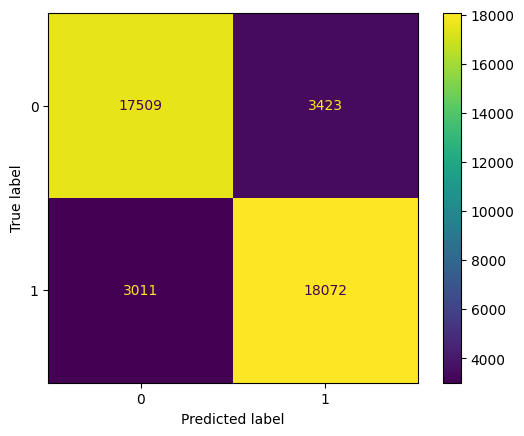

In [53]:
cm = confusion_matrix(y_test, y_pred, labels=clf_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_tree.classes_)
disp.plot()
plt.show()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
مدل KNN
</b>
</p>
</font>
</div>
</font>

In [54]:
KNN = KNeighborsClassifier()

KNN.fit(X_train , y_train)

KNeighborsClassifier()

In [55]:
y_pred = KNN.predict(X_test)

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
ارزیابی مدل KNN
</b>
</p>
</font>
</div>
</font>

In [56]:
print(classification_report(y_test, y_pred ,digits = 4))

              precision    recall  f1-score   support

           0     0.8293    0.9028    0.8645     20932
           1     0.8942    0.8154    0.8530     21083

    accuracy                         0.8590     42015
   macro avg     0.8617    0.8591    0.8587     42015
weighted avg     0.8618    0.8590    0.8587     42015



<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
می‌بینیم که میزان دقت (Accuracy) برای مدل ما، تقریبا برابر با 85.9 درصد، میزان F1-Score  تقریبا برابر با 85.3 درصد، میزان Precision تقریبا برابر با 89.4 درصد و میزان Recall  تقریبا برابر با 81.5 شده است که نشان می‌دهد مدل از عملکرد نسبتا خوبی برخوردار است و می‌تواند داده‌های تست را تا حد خوبی پیش‌بینی کند. پیش پردازش مناسب داده‌ها، می‌تواند بر روی کارآیی مدل تاثیر بگذارد و همان‌طور که در قسمت پیش پردازش داده گفته شد، ما با اعمال تغییراتی در نحوه پیش پردازش داده، کارآیی مدل خود را بهبود دادیم. همچنین این مدل از مدل درخت تصمیم ما کمی عملکرد بهتری داشته است. (میزان Accuracy و F1-Score و Precision برای مدل KNN کمی بیش‌تر از مدل Decision Tree و میزان Recall برای مدل KNN با اختلاف ناچیزی کمتر از مدل Decision Tree است.) در کل می‌توان دید که KNN بهتر از Decision Tree در پیش‌بینی داده‌های تست عمل کرده است.
</p>
</font>
</div>
</font>

In [57]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data = {'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
        'Score': [accuracy, f1, precision, recall]}
eval = pd.DataFrame(data)
print(eval)

      Metric     Score
0   Accuracy  0.858955
1   F1-score  0.852989
2  Precision  0.894159
3     Recall  0.815444


<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
رسم ماتریس آشفتگی
</b>
<br>
True Positives: مدل به درستی مقدار 1 (بارانی بودن) را برای 17191 مورد پیش‌بینی کرده است.
<br>
True Negatives: مدل به درستی مقدار 0 (بارانی نبودن) را برای 18907 مورد پیش‌بینی کرده است.
<br>
False Positives: مدل به اشتباه مقدار 1 (بارانی بودن) را زمانی که واقعاً مقدار 0 (بارانی نبودن) بوده برای 2025 مورد پیش‌بینی کرده است.
<br>
False Negatives: مدل به اشتباه مقدار 0 (بارانی نبودن) را زمانی که واقعاً مقدار 1 (بارانی بودن) بوده برای 3892 مورد پیش‌بینی کرده است.
</p>
</font>
</div>
</font>

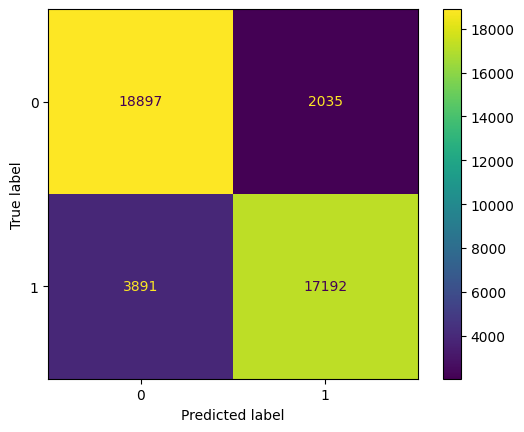

In [58]:
cm = confusion_matrix(y_test, y_pred, labels=clf_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_tree.classes_)
disp.plot()
plt.show()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
مدل SVM
</b>
<br>
ما ابتدا مدل SVM را با هسته‌های linear و rbf ساختیم که به دلیل حجم بسیار زیاد داده‌ها، این مدل‌ها مدت زمان بسیار زیادی برای اجرا صرف کردند که برای ما مقرون به صرفه نبود. همچنین می‌دانیم تفاوت‌ اصلی بین این دو هسته پارامتر این است که تابع هسته rbf می‌تواند مرزهای پیچیده‌تری نسبت به linear ایجاد کند، در حالی که linear برای داده‌هایی که خطی جدا می‌شوند مناسب است. در واقع linear سرعت اجرای بیش‌تر و غالبا دقت کم‌تری دارد، ولی rbf سرعت اجرای کم‌تر اما غالبا دقت بیش‌تری دارد، اما هر دو برای این حجم از داده کارساز نبوده و باید از هسته دیگری استفاده کنیم. بنابراین ما در اینجا از Linear SVC استفاده کردیم که برای داده‌های حجیم مناسب است و سرعت اجرای خیلی بیش‌تری نسبت به دو هسته قبلی دارد. LinearSVC یک نسخه خاص از SVC است که فقط با هسته‌ی خطی کار می‌کند. این الگوریتم برای داده‌هایی که با یک خط راست قابل جداسازی هستند، مناسب است و معمولاً سریع‌تر از SVC با هسته‌ی rbf است زیرا به محاسبات پیچیده‌ی تبدیل فضای ویژگی نیاز ندارد. با توجه به عملکرد خوب آن، همین هسته را برای مدل SVM خود برمی‌گزینیم.
</p>
</font>
</div>
</font>

In [59]:
# Initialize the SVM Model With a Linear Kernel
svc = LinearSVC(C=1, random_state=42)

# Fit the Model to the Data
svc.fit(X_train, y_train)

LinearSVC(C=1, random_state=42)

In [60]:
y_pred = svc.predict(X_test)

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
ارزیابی مدل SVM
</b>
</p>
</font>
</div>
</font>

In [61]:
print(classification_report(y_test, y_pred ,digits = 4))

              precision    recall  f1-score   support

           0     0.8650    0.9298    0.8963     20932
           1     0.9247    0.8560    0.8890     21083

    accuracy                         0.8928     42015
   macro avg     0.8949    0.8929    0.8926     42015
weighted avg     0.8950    0.8928    0.8926     42015



<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
می‌بینیم که میزان دقت (Accuracy) برای مدل ما، تقریبا برابر با 89.2 درصد، میزان F1-Score  تقریبا برابر با 88.9 درصد، میزان Precision تقریبا برابر با 92.4 درصد و میزان Recall  تقریبا برابر با 85.6 شده است که نشان می‌دهد مدل از عملکرد خوبی برخوردار است و می‌تواند داده‌های تست را تا حد خیلی خوبی پیش‌بینی کند. پیش پردازش مناسب داده‌ها، می‌تواند بر روی کارآیی مدل تاثیر بگذارد و همان‌طور که در قسمت پیش پردازش داده گفته شد، ما با اعمال تغییراتی در نحوه پیش پردازش داده، کارآیی مدل خود را بهبود دادیم. می‌بینیم که به صورت کلی مدل SVM ما از دو مدل دیگر عملکرد بهتری داشته است و میزان تمام معیارهای آن بیش‌تر از میزان معیارهای دو مدل قبلی شده است. در واقع با توجه به سرعت اجرای نسبتا خوب مدل (حدود دو دقیقه) برای این حجم از داده و عملکرد خوب آن، این مدل برای مجموعه داده ما مناسب است و اغلب پیش‌بینی‌های آن درست هستند.
</p>
</font>
</div>
</font>

In [62]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data = {'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
        'Score': [accuracy, f1, precision, recall]}
eval = pd.DataFrame(data)
print(eval)

      Metric     Score
0   Accuracy  0.892753
1   F1-score  0.889009
2  Precision  0.924725
3     Recall  0.855950


<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
<b>
رسم ماتریس آشفتگی
</b>
<br>
True Positives: مدل به درستی مقدار 1 (بارانی بودن) را برای 18049 مورد پیش‌بینی کرده است.
<br>
True Negatives: مدل به درستی مقدار 0 (بارانی نبودن) را برای 19452 مورد پیش‌بینی کرده است.
<br>
False Positives: مدل به اشتباه مقدار 1 (بارانی بودن) را زمانی که واقعاً مقدار 0 (بارانی نبودن) بوده برای 1480 مورد پیش‌بینی کرده است.
<br>
False Negatives: مدل به اشتباه مقدار 0 (بارانی نبودن) را زمانی که واقعاً مقدار 1 (بارانی بودن) بوده برای 3034 مورد پیش‌بینی کرده است.
</p>
</font>
</div>
</font>

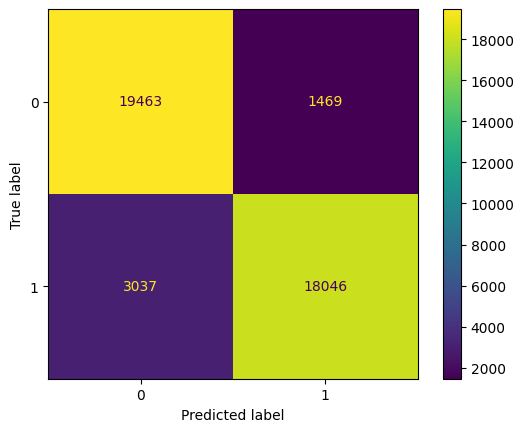

In [63]:
cm = confusion_matrix(y_test, y_pred, labels=clf_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_tree.classes_)
disp.plot()
plt.show()

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=6>
<b>
نتیجه‌گیری
</b>
</p>
</font>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
با توجه به معیارهای ارزیابی هر مدل، می‌توان به خوبی متوجه شد که مدل SVM از دو مدل Decision Tree و KNN برای این مجموعه داده عملکرد بهتری داشته است و میزان هر کدام از معیارهای ارزیابی آن بیش‌تر از دو مدل دیگر است. تمامی مدل‌ها عملکرد نسبتا خوبی در پیش‌بینی داده‌های تست داشته‌اند اما SVM در این زمینه بهتر عمل کرده است و استفاده از آن نتایج بهتری را حاصل کرده است.
</p>
</font>
</div>
</font>